In [1]:
# Focal cell:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')


# Data Loading

In [2]:
data = pd.read_csv('Health.csv')
data.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [4]:
# Display the transpose of the descriptive statistics of the data
data.describe().T


,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15972.0,2.922677,1.442694,0.0,2.0,3.0,4.0,5.0
PLACES_VISITED,15972.0,5.232970,3.311912,0.0,2.0,5.0,8.0,10.0
CORE_CIRCLE,15972.0,5.508077,2.840334,0.0,3.0,5.0,8.0,10.0
SUPPORTING_OTHERS,15972.0,5.616454,3.242021,0.0,3.0,5.0,10.0,10.0
SOCIAL_NETWORK,15972.0,6.474267,3.086672,0.0,4.0,6.0,10.0,10.0
ACHIEVEMENT,15972.0,4.000751,2.755837,0.0,2.0,3.0,6.0,10.0
DONATION,15972.0,2.715314,1.851586,0.0,1.0,3.0,5.0,5.0
BMI_RANGE,15972.0,1.410656,0.491968,1.0,1.0,1.0,2.0,2.0
TODO_COMPLETED,15972.0,5.745993,2.624097,0.0,4.0,6.0,8.0,10.0
FLOW,15972.0,3.194778,2.357518,0.0,1.0,3.0,5.0,10.0


**Data Cleaning**

In [5]:
count = (data['DAILY_STRESS'] == '1/1/00').sum()
count

1

In [6]:
# Calculate the mode of the 'DAILY_STRESS' column
mode = data['DAILY_STRESS'].mode()[0]
mode

# Replace '1/1/00' with the mode
data.loc[data['DAILY_STRESS'] == '1/1/00', 'DAILY_STRESS'] = mode

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [8]:
# Convert 'DAILY_STRESS' column to integer data type
data['DAILY_STRESS'] = data['DAILY_STRESS'].astype(int)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  int32  
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

**Column Transformation**

In [10]:


# Convert the 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                15972 non-null  datetime64[ns]
 1   FRUITS_VEGGIES           15972 non-null  int64         
 2   DAILY_STRESS             15972 non-null  int32         
 3   PLACES_VISITED           15972 non-null  int64         
 4   CORE_CIRCLE              15972 non-null  int64         
 5   SUPPORTING_OTHERS        15972 non-null  int64         
 6   SOCIAL_NETWORK           15972 non-null  int64         
 7   ACHIEVEMENT              15972 non-null  int64         
 8   DONATION                 15972 non-null  int64         
 9   BMI_RANGE                15972 non-null  int64         
 10  TODO_COMPLETED           15972 non-null  int64         
 11  FLOW                     15972 non-null  int64         
 12  DAILY_STEPS              15972 n

**Null Value Check**

In [12]:
data.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [13]:
data.duplicated().sum()

482

In [14]:
# Remove duplicate rows from the data DataFrame
data.drop_duplicates(inplace=True)


In [15]:
data.SUFFICIENT_INCOME.value_counts()

2    11316
1     4174
Name: SUFFICIENT_INCOME, dtype: int64

In [16]:
# Display the descriptive statistics of the dataset
data.describe().T


,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15490.0,2.922466,1.443356,0.0,2.0,3.0,4.0,5.0
DAILY_STRESS,15490.0,2.792318,1.369330,0.0,2.0,3.0,4.0,5.0
PLACES_VISITED,15490.0,5.225823,3.315740,0.0,2.0,5.0,8.0,10.0
CORE_CIRCLE,15490.0,5.513170,2.839156,0.0,3.0,5.0,8.0,10.0
SUPPORTING_OTHERS,15490.0,5.619496,3.244341,0.0,3.0,5.0,10.0,10.0
SOCIAL_NETWORK,15490.0,6.489606,3.084922,0.0,4.0,6.0,10.0,10.0
ACHIEVEMENT,15490.0,4.000194,2.760281,0.0,2.0,3.0,6.0,10.0
DONATION,15490.0,2.716333,1.851438,0.0,1.0,3.0,5.0,5.0
BMI_RANGE,15490.0,1.409038,0.491672,1.0,1.0,1.0,2.0,2.0
TODO_COMPLETED,15490.0,5.749645,2.623108,0.0,4.0,6.0,8.0,10.0


Here ordinal values are: TO-DO Lists [(1-10) scale], daily_stress, sufficient_income, BMI, age, gender

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object with feature range from 0 to 5
mc = MinMaxScaler(feature_range=(0, 5))

# Reshape the 'TODO_COMPLETED' column of the data and transform it using the MinMaxScaler
data['TODO_COMPLETED'] = mc.fit_transform(data['TODO_COMPLETED'].values.reshape(-1, 1))


In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15490.0,2.922466,1.443356,0.0,2.0,3.0,4.0,5.0
DAILY_STRESS,15490.0,2.792318,1.369330,0.0,2.0,3.0,4.0,5.0
PLACES_VISITED,15490.0,5.225823,3.315740,0.0,2.0,5.0,8.0,10.0
CORE_CIRCLE,15490.0,5.513170,2.839156,0.0,3.0,5.0,8.0,10.0
SUPPORTING_OTHERS,15490.0,5.619496,3.244341,0.0,3.0,5.0,10.0,10.0
SOCIAL_NETWORK,15490.0,6.489606,3.084922,0.0,4.0,6.0,10.0,10.0
ACHIEVEMENT,15490.0,4.000194,2.760281,0.0,2.0,3.0,6.0,10.0
DONATION,15490.0,2.716333,1.851438,0.0,1.0,3.0,5.0,5.0
BMI_RANGE,15490.0,1.409038,0.491672,1.0,1.0,1.0,2.0,2.0
TODO_COMPLETED,15490.0,2.874822,1.311554,0.0,2.0,3.0,4.0,5.0


# Exploratory Data Analysis and Feature Engineering

**One Hot Encoding**

In [19]:
# Get the columns of the data
data.columns


Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [20]:
encdata = pd.get_dummies(data, columns=['DAILY_STRESS', 'BMI_RANGE', 'TODO_COMPLETED', 'SUFFICIENT_INCOME', 'AGE', 'GENDER'], drop_first=True)


In [21]:
encdata.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
       'DAILY_SHOUTING', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE', 'DAILY_STRESS_1',
       'DAILY_STRESS_2', 'DAILY_STRESS_3', 'DAILY_STRESS_4', 'DAILY_STRESS_5',
       'BMI_RANGE_2', 'TODO_COMPLETED_0.5', 'TODO_COMPLETED_1.0',
       'TODO_COMPLETED_1.5', 'TODO_COMPLETED_2.0', 'TODO_COMPLETED_2.5',
       'TODO_COMPLETED_3.0', 'TODO_COMPLETED_3.5', 'TODO_COMPLETED_4.0',
       'TODO_COMPLETED_4.5', 'TODO_COMPLETED_5.0', 'SUFFICIENT_INCOME_2',
       'AGE_36 to 50', 'AGE_51 or more', 'AGE_Less than 20', 'GENDER_Male'],
      dtype='object')

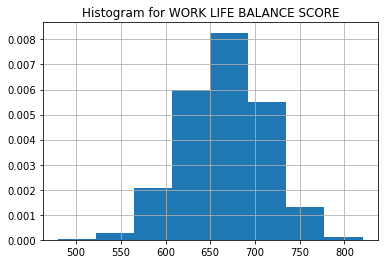

In [22]:
import matplotlib.pyplot as plt

# Plotting a histogram of the WORK_LIFE_BALANCE_SCORE
encdata.WORK_LIFE_BALANCE_SCORE.hist(bins=8, density=True)

# Setting the title of the plot
plt.title('Histogram for WORK LIFE BALANCE SCORE')

# Displaying the plot
plt.show()


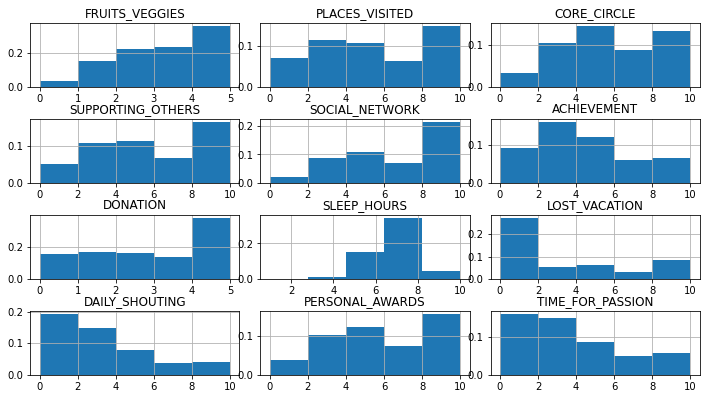

In [23]:
import itertools
import matplotlib.pyplot as plt

num_col = [
    'FRUITS_VEGGIES',
    'PLACES_VISITED',
    'CORE_CIRCLE',
    'SUPPORTING_OTHERS',
    'SOCIAL_NETWORK',
    'ACHIEVEMENT',
    'DONATION',
    'SLEEP_HOURS',
    'LOST_VACATION',
    'DAILY_SHOUTING',
    'PERSONAL_AWARDS',
    'TIME_FOR_PASSION',
]

plt.subplots(figsize=(12, 10))
length = len(num_col)

for i, j in itertools.zip_longest(num_col, range(length)):
    plt.subplot((length // 2), 3, j + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    encdata[i].hist(bins=5, density=True)
    plt.title(i)

plt.show()


In [24]:
import numpy as np

def outlier_detect(col):
    """
    Detect outliers in a column.

    Args:
        col (numpy.ndarray): Column of data.

    Returns:
        tuple: Upper and lower bounds for outlier detection.
    """
    mean = np.mean(col)
    sd = np.std(col)
    upp_bd = mean + 3 * sd
    low_bd = mean - 3 * sd
    return upp_bd, low_bd


In [25]:
upp_lis = []
low_lis = []

col = encdata.columns[1:18]
length = len(col)

# Iterate over each column
for i in col:
    # Perform outlier detection
    upp, low = outlier_detect(data[i])
    
    # Append upper and lower bounds to lists
    upp_lis.append(upp)
    low_lis.append(low)
    
# Create a dictionary with upper and lower bounds
d = {'Upper Bound': upp_lis, 'Lower Bound': low_lis}

# Create a DataFrame from the dictionary with column indices
outlier_df = pd.DataFrame(d, index=col)

outlier_df


,Upper Bound,Lower Bound
FRUITS_VEGGIES,7.252395,-1.407463
PLACES_VISITED,15.172721,-4.721075
CORE_CIRCLE,14.030362,-3.004022
SUPPORTING_OTHERS,15.352205,-4.113212
SOCIAL_NETWORK,15.744073,-2.764861
ACHIEVEMENT,12.280768,-4.280381
DONATION,8.270469,-2.837803
FLOW,10.257571,-3.877067
DAILY_STEPS,14.376966,-2.945074
LIVE_VISION,13.429741,-5.925415


In [26]:
import pandas as pd

def calculate_outlier_count(data: pd.DataFrame, col: list, outlier_df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates the count of outliers for each column in the data.
    
    Args:
        data (pd.DataFrame): The data containing the columns.
        col (list): The list of column names.
        outlier_df (pd.DataFrame): The dataframe containing upper and lower outlier limits for each column.
    
    Returns:
        pd.DataFrame: A dataframe with the count of outliers for each column.
    """
    count_lis = []
    for i in col:
        upp, low = outlier_df.loc[i]
        count = sum((data[i] > upp) | (data[i] < low))
        count_lis.append(count)

    d = {'Outlier Count': count_lis}
    outlier_count_df = pd.DataFrame(d, index=col)
    
    return outlier_count_df

#before the treatment
outlier_count_df = calculate_outlier_count(data, col, outlier_df)
outlier_count_df

,Outlier Count
FRUITS_VEGGIES,0
PLACES_VISITED,0
CORE_CIRCLE,0
SUPPORTING_OTHERS,0
SOCIAL_NETWORK,0
ACHIEVEMENT,0
DONATION,0
FLOW,0
DAILY_STEPS,0
LIVE_VISION,0


In [27]:
# Focal cell:

count_lis = []

# Iterate over each column in `col`
for i in col:
    upp, low = outlier_detect(data[i])
    # Replace values in `data[i]` that are greater than `upp` with `upp`,
    # values that are less than `low` with `low`, and leave other values unchanged
    data[i] = np.where(data[i] > upp, upp, np.where(data[i] < low, low, data[i]))


In [28]:
#after the treatment
outlier_count_df = calculate_outlier_count(data, col, outlier_df)
outlier_count_df

,Outlier Count
FRUITS_VEGGIES,0
PLACES_VISITED,0
CORE_CIRCLE,0
SUPPORTING_OTHERS,0
SOCIAL_NETWORK,0
ACHIEVEMENT,0
DONATION,0
FLOW,0
DAILY_STEPS,0
LIVE_VISION,0


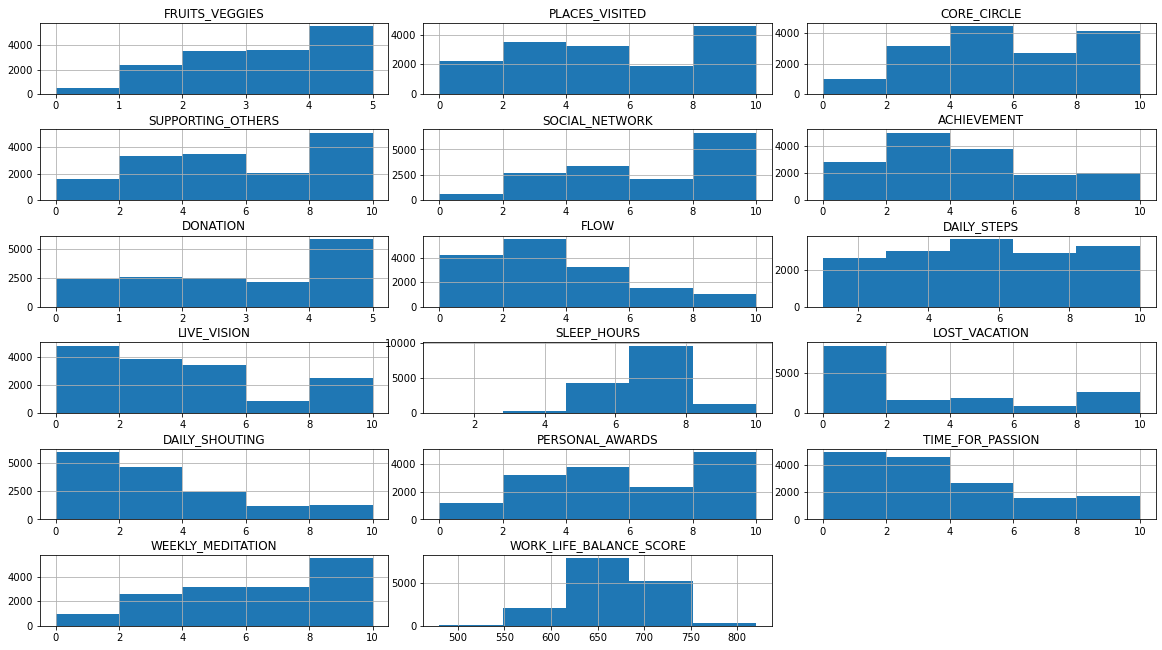

In [29]:
# Focal cell:

num_col = [
    'FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 
    'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'FLOW', 'DAILY_STEPS', 
    'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 
    'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE'
]

# Histogram of each feature
import itertools

plt.subplots(figsize=(20, 15))
length = len(num_col)

for i, j in itertools.zip_longest(num_col, range(length)):
    plt.subplot((length//2), 3, j + 1)
    plt.subplots_adjust(wspace=0.1, hspace=0.5)
    encdata[i].hist(bins=5)
    plt.title(i)

plt.show()


In [30]:
encdata.tail(5)

,Timestamp,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,FLOW,DAILY_STEPS,...,TODO_COMPLETED_3.0,TODO_COMPLETED_3.5,TODO_COMPLETED_4.0,TODO_COMPLETED_4.5,TODO_COMPLETED_5.0,SUFFICIENT_INCOME_2,AGE_36 to 50,AGE_51 or more,AGE_Less than 20,GENDER_Male
15967,2021-03-14 05:42:00,3,0,4,0,10,0,4,2,10,...,0,0,1,0,0,0,0,1,0,0
15968,2021-03-14 06:30:00,3,6,8,7,4,6,3,5,6,...,0,1,0,0,0,1,0,0,0,0
15969,2021-03-14 08:35:00,4,0,10,10,8,6,5,3,5,...,0,1,0,0,0,1,0,0,0,1
15970,2021-03-14 08:43:00,1,10,8,2,7,3,2,10,1,...,1,0,0,0,0,1,0,0,0,0
15971,2021-03-14 09:03:00,5,0,2,10,10,5,1,4,1,...,0,1,0,0,0,1,0,0,0,0


In [31]:
# Print the shape of the 'encdata' array
encdata.shape


(15490, 39)

In [32]:
# Focal cell:

# Get the date and work-life balance score from encdata
date = encdata.Timestamp
output = encdata.WORK_LIFE_BALANCE_SCORE

# Remove 'Timestamp' and 'WORK_LIFE_BALANCE_SCORE' columns from encdata
encdata.drop(['Timestamp', 'WORK_LIFE_BALANCE_SCORE'], axis=1, inplace=True)

# Insert 'Timestamp' column at the beginning of encdata
encdata.insert(0, 'Timestamp', date)

# Insert 'WORK_LIFE_BALANCE_SCORE' column at index 38 of encdata
encdata.insert(38, 'WORK_LIFE_BALANCE_SCORE', output)


In [33]:
encdata.head()

,Timestamp,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,FLOW,DAILY_STEPS,...,TODO_COMPLETED_3.5,TODO_COMPLETED_4.0,TODO_COMPLETED_4.5,TODO_COMPLETED_5.0,SUFFICIENT_INCOME_2,AGE_36 to 50,AGE_51 or more,AGE_Less than 20,GENDER_Male,WORK_LIFE_BALANCE_SCORE
0,2015-07-07,3,2,5,0,5,2,0,4,5,...,0,0,0,0,0,1,0,0,0,609.5
1,2015-07-07,2,4,3,8,10,5,2,2,5,...,0,0,0,0,1,1,0,0,0,655.6
2,2015-07-07,2,3,4,4,10,3,2,2,4,...,0,0,0,0,1,1,0,0,0,631.6
3,2015-07-07,3,10,3,10,7,2,5,5,5,...,0,0,0,0,0,0,1,0,0,622.7
4,2015-07-07,5,3,3,10,4,2,4,0,5,...,0,0,0,0,1,0,1,0,0,663.9


<AxesSubplot:>

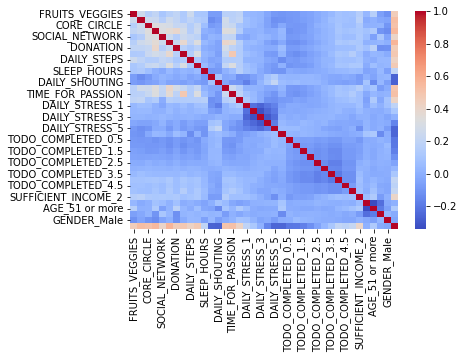

In [34]:
# Compute the correlation matrix
cor = encdata.drop('Timestamp', axis=1).corr()

# Plot the correlation matrix
sns.heatmap(cor, cmap='coolwarm')


In [35]:
encdata.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
       'DAILY_SHOUTING', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'DAILY_STRESS_1', 'DAILY_STRESS_2',
       'DAILY_STRESS_3', 'DAILY_STRESS_4', 'DAILY_STRESS_5', 'BMI_RANGE_2',
       'TODO_COMPLETED_0.5', 'TODO_COMPLETED_1.0', 'TODO_COMPLETED_1.5',
       'TODO_COMPLETED_2.0', 'TODO_COMPLETED_2.5', 'TODO_COMPLETED_3.0',
       'TODO_COMPLETED_3.5', 'TODO_COMPLETED_4.0', 'TODO_COMPLETED_4.5',
       'TODO_COMPLETED_5.0', 'SUFFICIENT_INCOME_2', 'AGE_36 to 50',
       'AGE_51 or more', 'AGE_Less than 20', 'GENDER_Male',
       'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [36]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = encdata.drop(['Timestamp','WORK_LIFE_BALANCE_SCORE'],axis = 1).columns
vif_data["VIF"] = [variance_inflation_factor(encdata.drop(['Timestamp','WORK_LIFE_BALANCE_SCORE'],axis = 1).values, i)
                          for i in range(len(encdata.drop(['Timestamp','WORK_LIFE_BALANCE_SCORE'],axis = 1).columns))]

print(vif_data)

                feature        VIF
0        FRUITS_VEGGIES   6.313470
1        PLACES_VISITED   4.477046
2           CORE_CIRCLE   6.202254
3     SUPPORTING_OTHERS   6.188141
4        SOCIAL_NETWORK   7.021762
5           ACHIEVEMENT   4.717253
6              DONATION   4.099659
7                  FLOW   4.177063
8           DAILY_STEPS   5.698127
9           LIVE_VISION   2.959157
10          SLEEP_HOURS  25.146244
11        LOST_VACATION   1.721352
12       DAILY_SHOUTING   2.472770
13      PERSONAL_AWARDS   5.916238
14     TIME_FOR_PASSION   3.698041
15    WEEKLY_MEDITATION   6.274840
16       DAILY_STRESS_1   3.847949
17       DAILY_STRESS_2   4.962532
18       DAILY_STRESS_3   6.106791
19       DAILY_STRESS_4   4.561669
20       DAILY_STRESS_5   3.462100
21          BMI_RANGE_2   1.839460
22   TODO_COMPLETED_0.5   1.850097
23   TODO_COMPLETED_1.0   2.515880
24   TODO_COMPLETED_1.5   3.112949
25   TODO_COMPLETED_2.0   3.058738
26   TODO_COMPLETED_2.5   4.362744
27   TODO_COMPLETED_

# Model Building

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    encdata.drop(['Timestamp', 'WORK_LIFE_BALANCE_SCORE'], axis=1),
    encdata.WORK_LIFE_BALANCE_SCORE,
    test_size=0.3,
    random_state=42
)


In [38]:
X_train.shape,X_test.shape

((10843, 37), (4647, 37))

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the StandardScaler
sc = StandardScaler()

# Scale the features of the training data
X_train_scl = sc.fit_transform(X_train)

# Scale the features of the test data
X_test_scl = sc.transform(X_test)

# Scale the target variable of the training data
y_train_scl = sc.fit_transform(y_train.values.reshape(-1,1))

# Scale the target variable of the test data
y_test_scl = sc.transform(y_test.values.reshape(-1,1))


In [40]:
X_test_scl

array([[ 0.03928665,  1.44924047,  1.57456642, ..., -0.52087393,
        -0.35966863, -0.7812978 ],
       [ 1.42460431,  0.54199396, -0.88958133, ..., -0.52087393,
        -0.35966863, -0.7812978 ],
       [-2.03868984, -0.97008356, -0.88958133, ..., -0.52087393,
        -0.35966863,  1.27992168],
       ...,
       [ 0.73194548,  0.54199396, -0.18553911, ..., -0.52087393,
         2.78033699, -0.7812978 ],
       [ 1.42460431, -0.06283705,  0.5185031 , ..., -0.52087393,
        -0.35966863, -0.7812978 ],
       [ 0.73194548, -0.06283705,  1.57456642, ..., -0.52087393,
         2.78033699,  1.27992168]])

In [41]:
encdata.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE',
       'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION',
       'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION',
       'DAILY_SHOUTING', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'DAILY_STRESS_1', 'DAILY_STRESS_2',
       'DAILY_STRESS_3', 'DAILY_STRESS_4', 'DAILY_STRESS_5', 'BMI_RANGE_2',
       'TODO_COMPLETED_0.5', 'TODO_COMPLETED_1.0', 'TODO_COMPLETED_1.5',
       'TODO_COMPLETED_2.0', 'TODO_COMPLETED_2.5', 'TODO_COMPLETED_3.0',
       'TODO_COMPLETED_3.5', 'TODO_COMPLETED_4.0', 'TODO_COMPLETED_4.5',
       'TODO_COMPLETED_5.0', 'SUFFICIENT_INCOME_2', 'AGE_36 to 50',
       'AGE_51 or more', 'AGE_Less than 20', 'GENDER_Male',
       'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [42]:
"""
Focal cell:

Imports:
- `train_test_split` from `sklearn.model_selection`
- `LinearRegression` from `sklearn.linear_model`
- `DecisionTreeRegressor` from `sklearn.tree`
- `KNeighborsRegressor` from `sklearn.neighbors`
- `SVR` from `sklearn.svm`
- `SGDRegressor` from `sklearn.linear_model`
- `Lasso` from `sklearn.linear_model`
- `Ridge` from `sklearn.linear_model`
- `RandomForestRegressor` from `sklearn.ensemble`
- `mean_squared_error` from `sklearn.metrics`
- `r2_score` from `sklearn.metrics`
"""

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [43]:
# Train a Linear Regression model
reg = LinearRegression()
reg.fit(X_train_scl, y_train)
reg_pred = reg.predict(X_test_scl)
reg_rmse = mean_squared_error(y_test, reg_pred, squared=False)
reg_r2 = r2_score(y_test, reg_pred)

# Print the performance metrics
print("For "+str(reg.__class__.__name__)+": RMSE = {:.2f}, R^2 = {:.2f}".format(reg_rmse, reg_r2))


For LinearRegression: RMSE = 0.00, R^2 = 1.00


In [44]:
# Train a Decision Tree Regression model
reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train_scl, y_train)
reg_pred = reg.predict(X_test_scl)
reg_rmse = mean_squared_error(y_test, reg_pred, squared=False)
reg_r2 = r2_score(y_test, reg_pred)

# Print the performance metrics
print("For "+str(reg.__class__.__name__)+": RMSE = {:.2f}, R^2 = {:.2f}".format(reg_rmse, reg_r2))


For DecisionTreeRegressor: RMSE = 24.18, R^2 = 0.71


In [45]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of SVR
reg = SVR()

# Fit the SVR model to the training data
reg.fit(X_train_scl, y_train)

# Make predictions using the trained model
reg_pred = reg.predict(X_test_scl)

# Calculate the root mean squared error
reg_rmse = mean_squared_error(y_test, reg_pred, squared=False)

# Calculate the R^2 score
reg_r2 = r2_score(y_test, reg_pred)

# Print the performance metrics
print("For "+str(reg.__class__.__name__)+": RMSE = {:.2f}, R^2 = {:.2f}".format(reg_rmse, reg_r2))


For SVR: RMSE = 7.40, R^2 = 0.97


In [46]:
# Focal cell

# Create and fit the KNeighborsRegressor model
reg = KNeighborsRegressor()
reg.fit(X_train_scl, y_train)

# Make predictions using the fitted model
reg_pred = reg.predict(X_test_scl)

# Calculate the root mean squared error
reg_rmse = mean_squared_error(y_test, reg_pred, squared=False)

# Calculate the R^2 score
reg_r2 = r2_score(y_test, reg_pred)

# Print the results
print("For "+str(reg.__class__.__name__)+": RMSE = {:.2f}, R^2 = {:.2f}".format(reg_rmse, reg_r2))


For KNeighborsRegressor: RMSE = 14.92, R^2 = 0.89


In [47]:
# Focal cell

# Importing the necessary libraries
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating an instance of SGDRegressor
reg = SGDRegressor(random_state=42)

# Fitting the model on the scaled training data
reg.fit(X_train_scl, y_train)

# Making predictions on the scaled test data
reg_pred = reg.predict(X_test_scl)

# Calculating the root mean squared error
reg_rmse = mean_squared_error(y_test, reg_pred, squared=False)

# Calculating the R^2 score
reg_r2 = r2_score(y_test, reg_pred)

# Printing the results
print("For "+str(reg.__class__.__name__)+": RMSE = {:.2f}, R^2 = {:.2f}".format(reg_rmse, reg_r2))


For SGDRegressor: RMSE = 0.03, R^2 = 1.00


In [48]:
# Importing necessary libraries
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Creating and fitting the Lasso model
reg = Lasso(alpha=2)
reg.fit(X_train_scl, y_train)

# Predicting with the Lasso model
reg_pred = reg.predict(X_test_scl)

# Calculating performance metrics
reg_rmse = mean_squared_error(y_test, reg_pred, squared=False)
reg_r2 = r2_score(y_test, reg_pred)

# Printing the performance metrics
print("For "+str(reg.__class__.__name__)+": RMSE = {:.2f}, R^2 = {:.2f}".format(reg_rmse, reg_r2))


For Lasso: RMSE = 6.92, R^2 = 0.98


In [49]:
# Import necessary libraries

# Create a Ridge regression model with alpha=1
reg = Ridge(alpha=1)

# Fit the model on the scaled training data
reg.fit(X_train_scl, y_train)

# Make predictions on the scaled test data
reg_pred = reg.predict(X_test_scl)

# Calculate the root mean squared error
reg_rmse = mean_squared_error(y_test, reg_pred, squared=False)

# Calculate the R-squared score
reg_r2 = r2_score(y_test, reg_pred)

# Print the performance metrics
print("For "+str(reg.__class__.__name__)+": RMSE = {:.2f}, R^2 = {:.2f}".format(reg_rmse, reg_r2))


For Ridge: RMSE = 0.01, R^2 = 1.00


In [50]:

# Import the necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create an instance of the RandomForestRegressor
reg = RandomForestRegressor(random_state=42)

# Fit the model on the training data
reg.fit(X_train_scl, y_train)

# Make predictions on the test data
reg_pred = reg.predict(X_test_scl)

# Calculate the root mean squared error
reg_rmse = mean_squared_error(y_test, reg_pred, squared=False)

# Calculate the R^2 score
reg_r2 = r2_score(y_test, reg_pred)

# Print the performance metrics
print("For "+str(reg.__class__.__name__)+": RMSE = {:.2f}, R^2 = {:.2f}".format(reg_rmse, reg_r2))


For RandomForestRegressor: RMSE = 12.54, R^2 = 0.92


In [51]:
reg_pred

array([696.182, 684.265, 613.294, ..., 745.046, 691.827, 702.682])

In [52]:
y_test

2197     694.7
7072     686.0
6914     614.8
4012     722.5
8718     737.8
         ...  
13014    700.0
1606     708.1
6499     762.7
9196     693.2
812      718.5
Name: WORK_LIFE_BALANCE_SCORE, Length: 4647, dtype: float64

In [53]:
import statsmodels.api as sm
x = sm.add_constant(X_train_scl)
result = sm.OLS(y_train, x).fit()
print(result.summary())

                               OLS Regression Results                              
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 1.386e+08
Date:                     Sun, 11 Jun 2023   Prob (F-statistic):               0.00
Time:                             12:22:06   Log-Likelihood:                 14222.
No. Observations:                    10843   AIC:                        -2.837e+04
Df Residuals:                        10805   BIC:                        -2.809e+04
Df Model:                               37                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co